In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1. 质心、弧长、面积、轮廓近似

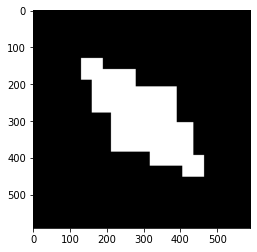

In [25]:
img = cv.imread('pic/test1_bin.png', -1)
show(img)

In [26]:
cnts, hiers = cv.findContours(img, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

cnt = cnts[0]

In [23]:
M = cv.moments(cnt)

M

{'m00': 53447.0,
 'm10': 15848778.5,
 'm01': 10236024.0,
 'm20': 5050616598.333333,
 'm11': 3260210472.583333,
 'm02': 2279690413.833333,
 'm30': 1705594295435.25,
 'm21': 1100037601285.0833,
 'm12': 761389695480.4166,
 'm03': 558434625363.0,
 'mu20': 350936916.7410593,
 'mu11': 224895541.96638536,
 'mu02': 319314951.62636137,
 'mu30': -206716356.10302734,
 'mu21': -620470746.345047,
 'mu12': -755621329.5012665,
 'mu03': -474140430.78601074,
 'nu20': 0.12285204492844944,
 'nu11': 0.07872889943422076,
 'nu02': 0.11178218338446383,
 'nu30': -0.0003130159788938229,
 'nu21': -0.0009395350310131144,
 'nu12': -0.0011441840142006404,
 'nu03': -0.0007179573686063468}

In [27]:
# 质心
xc = int(M['m10'] / M['m00'])
yc = int(M['m01'] / M['m00'])

xc, yc

(296, 191)

In [9]:
# 弧长
arc = cv.arcLength(cnt, False)
arc

1243.313708305359

In [10]:
# 面积
area = cv.contourArea(cnt)
area

53447.0

In [19]:
# 轮廓近似
epsilon = 0.05 * cv.arcLength(cnt, True)
approx = cv.approxPolyDP(cnt, epsilon, True)

approx

array([[[130, 130]],

       [[211, 383]],

       [[462, 451]],

       [[388, 207]]], dtype=int32)

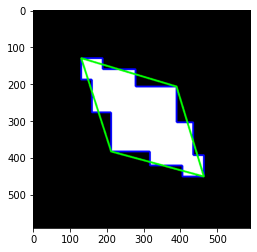

In [20]:
bgr = cv.merge([img, img, img])

cv.drawContours(bgr, [cnt], 0, (255, 0, 0), 3)
cv.drawContours(bgr, [approx], 0, (0, 255, 0), 3)
show(bgr)

## 2. 外接矩形、最小外接矩形、凸包、外接圆、拟合椭圆

In [17]:
img = cv.imread('pic/test1_bin.png', -1)
bgr = cv.merge([img, img, img])

cnts, hiers = cv.findContours(img, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)
cnt = cnts[0]

1.0341614906832297


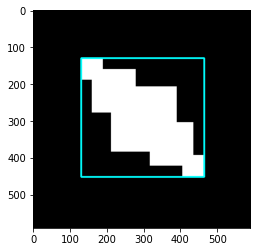

In [30]:
## 外接矩形
x, y, w, h = cv.boundingRect(cnt)
img1 = cv.rectangle(bgr.copy(), (x, y), (x+w, y+h), (255, 255, 0), 3)

print(w / h)

show(img1)

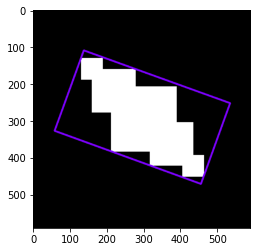

In [23]:
## 最小外接矩形
min_rect = cv.boxPoints(cv.minAreaRect(cnt)).astype(np.int32)
img2 = cv.drawContours(bgr.copy(), [min_rect], 0, (255, 0, 125), 3)

show(img2)

0.7834391169874378


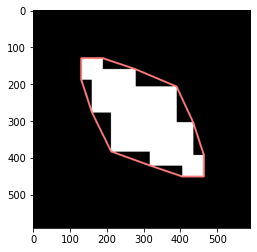

In [31]:
## 凸包
hull = cv.convexHull(cnt)
img3 = cv.drawContours(bgr.copy(), [hull], 0, (125, 125, 255), 3)

s1 = cv.contourArea(cnt) / cv.contourArea(hull)
print(s1)

show(img3)

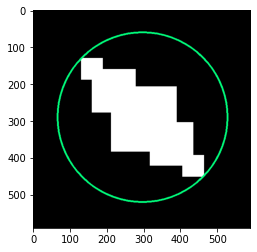

In [27]:
## 最小外接圆
(x, y), r = cv.minEnclosingCircle(cnt)
img4 = cv.circle(bgr.copy(), (int(x), int(y)), int(r), (125, 255, 0), 3)

show(img4)

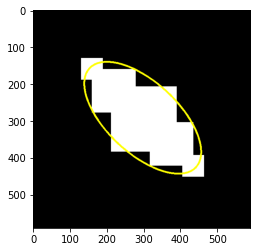

In [29]:
## 拟合椭圆
box = cv.fitEllipse(cnt)
img5 = cv.ellipse(bgr.copy(), box, (0, 255, 255), 3)

show(img5)

## 3. 实战：轮廓匹配

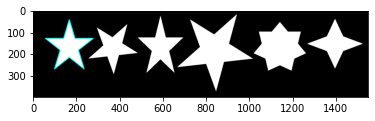

0.000509473283966777


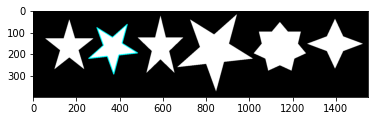

0.05288135758213053


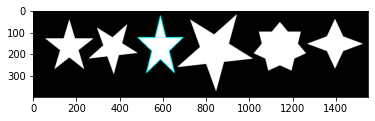

1.1214127133193452


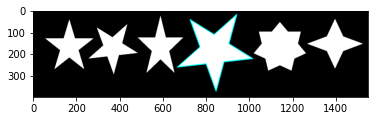

0.049466531063638075


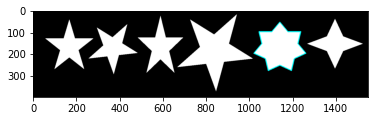

0.7514706288864516


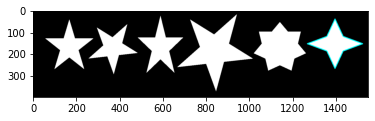

0.3135349232798057


In [38]:
img1 = cv.imread('pic/star.png', -1)
img2 = cv.imread('pic/stars.png', -1)

cnts1, hiers1 = cv.findContours(img1, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
cnts2, hiers2 = cv.findContours(img2, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

cnt = cnts1[0]

cnts2.sort(key=lambda x:x[:, 0, 0].min())
for c in cnts2:
    diff = cv.matchShapes(cnt, c, cv.CONTOURS_MATCH_I2, 0.0)
    img_temp = cv.drawContours(cv.merge([img2, img2, img2]), [c], 0, (255, 255, 0), 3)
    show(img_temp)
    print(diff)